## This script contains the following points:

### Importing Data & Libraries
### PART 1
###  Addressing any PII data in the data before continuing the analysis
###  Create a regional segmentation of the data and compare the regions in their spendings
###  Create an exclusion flag for low-activity customers
###  Create a customer profile (order day, order hour, age, income, certain goods and number of dependents)
###  Create visualization to show the distribution of profiles.
###  Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
###  Compare customer profiles with regions and departments.
###  Produce suitable charts to illustrate your results and export them in your project folder.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# assigning path
path=r'C:\Users\Gal-E\CF Data Analysis\Achievement 4\03-2024 Instacart Basket Analysis'

# import "all_merged.pkl" dataframe from "Prepared Data" folder
df_complete=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_merged.pkl'))

In [3]:
# import "departments_wrangled.csv" dataframe from "Prepared Data" folder
df_dep=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
df_complete.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620


In [5]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
df_dep = df_dep.drop(columns = ['Unnamed: 0'])

##  Addressing any PII data in the data before continuing the analysis

In [7]:
# dropping tow column that containing personal information 'first_name' and 'last_name'
df_complete = df_complete.drop(columns = ['first_name', 'last_name', 'busiest_day'])

In [8]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   product_id              int64         
 1   product_name            object        
 2   aisle_id                int64         
 3   department_id           int64         
 4   prices                  float64       
 5   order_id                int64         
 6   user_id                 int64         
 7   order_number            int64         
 8   orders_day_of_week      int64         
 9   order_hour_of_day       int64         
 10  days_since_prior_order  float64       
 11  add_to_cart_order       int64         
 12  reordered               int64         
 13  price_label             object        
 14  busiest_days            object        
 15  busiest_period_of_day   object        
 16  max_order               int64         
 17  loyalty_flag            object        
 18  

##  Create a regional segmentation of the data and compare the regions in their spendings

In [9]:
# creating lists of states for four geographical regions
Northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [10]:
Midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
South_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
West_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# set the region for each state in the main dataframe
df_complete.loc[df_complete['state'].isin(Northeast_states), 'region'] = 'Northeast'

In [14]:
df_complete.loc[df_complete['state'].isin(Midwest_states), 'region'] = 'Midwest_states'

In [15]:
df_complete.loc[df_complete['state'].isin(South_states), 'region'] = 'South_states'

In [16]:
df_complete.loc[df_complete['state'].isin(West_states), 'region'] = 'West_states'

In [17]:
# checking the frequency of 'region'
df_complete['region'].value_counts(dropna = False)

region
South_states      10791885
West_states        8292913
Midwest_states     7597325
Northeast          5722736
Name: count, dtype: int64

In [197]:
df_complete[['state', 'region']].head()

,state,region
0,Minnesota,Midwest_states
1,Minnesota,Midwest_states
2,Minnesota,Midwest_states
3,Minnesota,Midwest_states
4,Minnesota,Midwest_states


In [19]:
# total customer numbers within each region

df_complete.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

,user_id
region,
South_states,68737
West_states,52565
Midwest_states,48519
Northeast,36388


In [20]:
# spending_flag customers by user_id in each region

df_complete.groupby(['region', 'spender_flag'])['user_id'].nunique().unstack(fill_value=0)

spender_flag,High_spender,Low_spender
region,,
Midwest_states,801,47718
Northeast,545,35843
South_states,1141,67596
West_states,901,51664


In [21]:
# total number of orders by region

df_complete.groupby('region')['order_id'].nunique().sort_values(ascending=False)

region
South_states      1071562
West_states        821686
Midwest_states     754275
Northeast          567162
Name: order_id, dtype: int64

In [22]:
# compare a weekdays for shopping

df_complete.groupby(['region', 'orders_day_of_week'])['order_id'].nunique().unstack(fill_value=0)

orders_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest_states,131163,130433,103910,96657,93707,100014,98391
Northeast,98424,98515,77975,73042,70894,75147,73165
South_states,185044,186085,147394,137507,133877,141844,139811
West_states,143114,141646,112650,105165,102712,108938,107461


#### from the results we can clearly determine that due to higher number of population the South has the most users and has most number of orders

In [23]:
# Define the mapping of integers to day names
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Convert to categorical
df_complete['orders_day_of_week'] = df_complete['orders_day_of_week'].map(day_mapping).astype('category')

In [24]:
df_complete['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
Saturday     6204182
Sunday       5660230
Friday       4496490
Monday       4213830
Thursday     4205791
Tuesday      3840534
Wednesday    3783802
Name: count, dtype: int64

##  Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [25]:
# create low-activity flag

df_complete.loc[df_complete['order_number'] < 5, 'low_activity'] = 'yes'

In [26]:
df_complete.loc[df_complete['order_number'] >= 5, 'low_activity'] = 'no'

In [27]:
# creating table excluding low activity customers
low_excluded = df_complete[df_complete['low_activity'] == 'no']

In [28]:
# compare shapes of original and new table
df_complete.shape

(32404859, 31)

In [29]:
low_excluded.shape

(24414877, 31)

##  Create a customer profile (order hour, order day, age, income, certain goods and number of dependents)

In [32]:
# merging 'low_excluded' and 'df_dep' as 'df_comp'
df_comp = low_excluded.merge(df_dep, left_on='department_id', right_index=True)

In [33]:
df_comp['department'].value_counts(dropna=False)

department
alcohol            7227091
household          4120488
deli               2187121
pets               2036447
other              1627614
breakfast          1385375
produce             883330
dairy eggs          787790
missing             783011
bulk                633725
babies              539349
canned goods        524945
pantry              523890
snacks              335947
meat seafood        328480
beverages           197900
international       107972
dry goods pasta      72111
personal care        27558
bakery               27166
Name: count, dtype: int64

In [229]:
# for the visualisation on excel creating royalty flag for all customers
df_complete['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [231]:
# for the visualisation on excel creating royalty flag for mid to high activity customers 
# excluding customers who have less than 5 orders
df_comp['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    12712846
Loyal customer       9537205
New customer         2107259
Name: count, dtype: int64

### Creating behavior flag for order hour

In [225]:
# setting the 'regular' flag

df_comp['shopping_behavior'] = 'regular'

In [41]:
# setting the 'early_bird' flag for customers who orders between 5am- 8am
df_comp.loc[df_comp['order_hour_of_day'].between(5, 8), 'shopping_behavior'] = 'early_bird'

In [40]:
# setting the 'night_owl' flag  for customers who orders between 22pm- 5am
df_comp.loc[(df_comp['order_hour_of_day'] >= 22) | (df_comp['order_hour_of_day'] < 5), 'shopping_behavior'] = 'night_owl'

In [42]:
# checking frequency from 'shopping_behavior'
df_comp['shopping_behavior'].value_counts(dropna = False)

shopping_behavior
regular       20866739
early_bird     2345395
night_owl      1145176
Name: count, dtype: int64

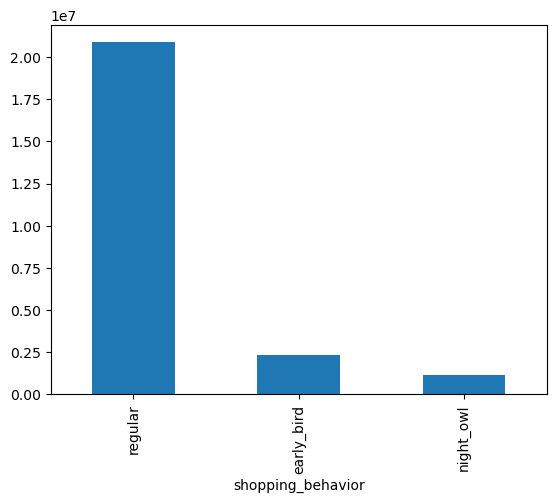

In [43]:
# creating bar chart for shopping behavior
bar_shopping_behavior = df_comp['shopping_behavior'].value_counts().plot.bar()

In [53]:
# creating min, max, and mean order numbers for each behavior
expenditure_stats = df_comp.groupby('shopping_behavior')['order_number'].agg(['min', 'max', 'mean'])

In [54]:
# creating the expenditure for each order for each customer
expenditure_total = df_comp.groupby(['shopping_behavior', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [55]:
# creating the expenditure statistics for each customer 
expenditure_total = expenditure_total.groupby(['shopping_behavior', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [56]:
expenditure_total

,shopping_behavior,user_id,min,max,mean
0,early_bird,1,25.0,63.1,44.050000
1,early_bird,7,74.7,74.7,74.700000
2,early_bird,13,83.8,83.8,83.800000
3,early_bird,14,100.2,237.5,155.520000
4,early_bird,15,10.1,10.1,10.100000
...,...,...,...,...,...
274436,regular,206203,126.6,126.6,126.600000
274437,regular,206206,9.6,157.3,32.957143
274438,regular,206207,47.5,196.9,110.966667
274439,regular,206208,46.0,238.5,119.027500


In [57]:
# creating the expenditure statistics for each behavior flag
expenditure_behavior = expenditure_total.groupby('shopping_behavior').agg({'min':'min', 'max':'max', 'mean':'mean'}).reset_index()

In [58]:
expenditure_behavior

,shopping_behavior,min,max,mean
0,early_bird,1.0,721.0,79.510527
1,night_owl,1.0,875.0,83.126474
2,regular,1.0,1047.4,78.199256


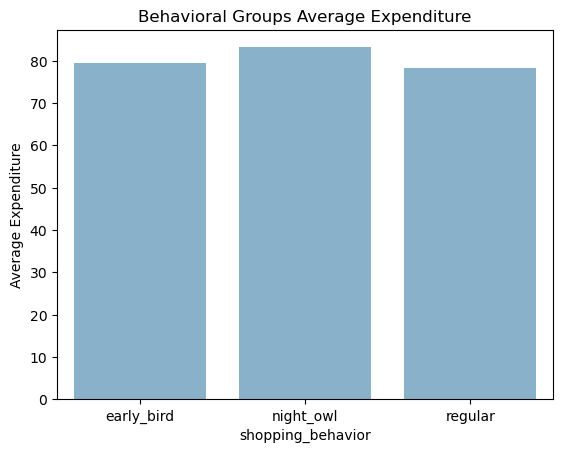

In [69]:
# creating table with average order expense 
expenditure_behavior = sns.barplot(x = 'shopping_behavior', y = 'mean', data = behavior_price_stats,  color = '#7FB3D5')
# adding titles 
plt.ylabel('Average Expenditure')
plt.title('Behavioral Groups Average Expenditure')
# exporting the chart
plt.savefig(r'C:\Users\Gal-E\CF Data Analysis\Achievement 4\03-2024 Instacart Basket Analysis\04 Analysis\Visualizations\expenditure_behavior.png')

In [226]:
# writing function called "price_label" that will apply a string label to every row within the dataframe
# designating it as a low-, mid-, or high-range product based on its price
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range Product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range Product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [227]:
df_comp['price_range'] = df_comp.apply(price_label, axis=1)

In [228]:
df_comp['price_range'].value_counts()

price_range
Mid-range Product    16442155
Low-range Product     7610179
High range             304976
Name: count, dtype: int64

### Order Hour

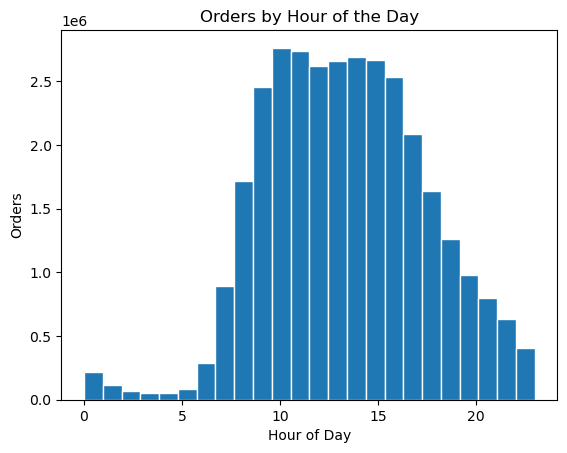

In [106]:
#create a histogram of orders hour of day column
hist_order_hour = df_complete['order_hour_of_day'].plot.hist(bins=24, edgecolor='white')
# adding labels & title
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.title('Orders by Hour of the Day')
#save visual
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ohd.png'))

### Order Day

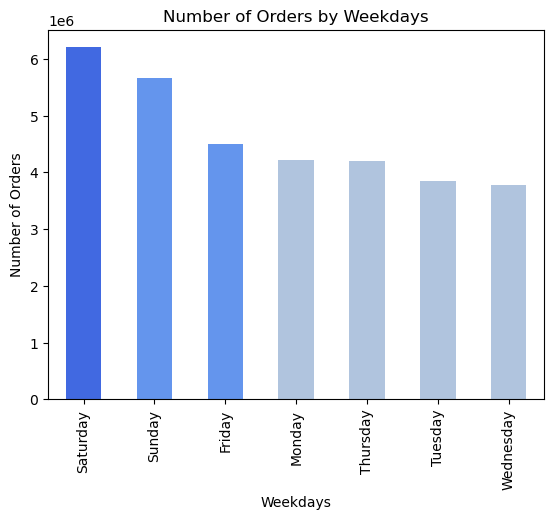

In [95]:
# defining colors for better visualisation
colors = ['royalblue', 'cornflowerblue', 'cornflowerblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue', 'lightsteelblue']
# Creating a Bar Chart for 'orders_day_of_week'
bar_DOW = df_complete['orders_day_of_week'].value_counts().plot.bar(color=colors)
# adding labels & title
plt.xlabel('Weekdays')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Weekdays')
# save it to Projekt folder
bar_DOW.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_DOW.png'))

### 6. Create visualization to show the distribution of profiles.

In [74]:
# creating a crosstable with 'shopping_behavior' and 'department'
beh_dep_cross = pd.crosstab(df_comp['department'], df_comp['shopping_behavior'], dropna = False)

In [75]:
beh_dep_cross

shopping_behavior,early_bird,night_owl,regular
department,,,
alcohol,711136,363580,6152375
babies,52922,25268,461159
bakery,2442,1273,23451
beverages,17009,9884,171007
breakfast,126113,68704,1190558
bulk,58520,30326,544879
canned goods,55596,23684,445665
dairy eggs,71016,38075,678699
deli,199028,92871,1895222


In [108]:
# create table for clustered bar graph
dep_behavior = beh_dep_cross.reset_index().melt(id_vars='department', var_name='shopping_behavior', value_name='count')

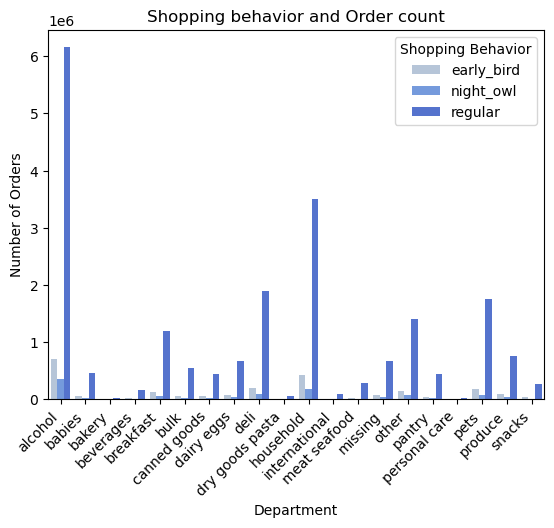

In [223]:
# create clustered bar graph for shopping behavior and department
bar_dep_beh = sns.barplot(x='department', y='count', hue='shopping_behavior', data=dep_behavior, palette = ['lightsteelblue', 'cornflowerblue', 'royalblue'])
# adding labels and title
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Shopping behavior and Order count')
# add legend title
plt.legend(title='Shopping Behavior')
plt.xticks(rotation=45, ha='right')
# save figure
bar_dep_beh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_beh2.png'))

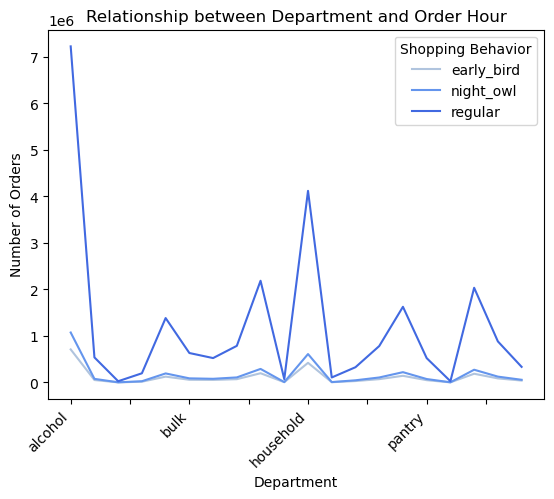

In [224]:
# create stacked line chart for number of orders per department per shopping behavior with color
line_beh_dep = beh_dep_cross.plot(kind = 'line', stacked = True, color = ['lightsteelblue', 'cornflowerblue', 'royalblue'])

# adding labels and title
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Relationship between Department and Order Hour')
# add legend title
plt.legend(title='Shopping Behavior')
plt.xticks(rotation=45, ha='right')
# save figure
line_beh_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_beh_dep.png'))

In [120]:
# creating a crosstable with 'region','shopping_behavior' and 'department'
reg_dep_cross = pd.crosstab(index=[df_comp['department']], columns=[df_comp['region'], df_comp['shopping_behavior']], dropna = False)

In [117]:
reg_dep_cross

region            Midwest_states                     Northeast            \
shopping_behavior     early_bird night_owl  regular early_bird night_owl   
department                                                                 
alcohol                   165215     85659  1444977     125007     65801   
babies                     12342      6024   110098       9442      4370   
bakery                       597       320     5367        428       215   
beverages                   4005      2334    40268       2936      1646   
breakfast                  29597     16133   280646      21763     12175   
bulk                       13511      7240   127778      10158      5433   
canned goods               12827      5486   103448      10388      4212   
dairy eggs                 16470      9000   158724      12353      6769   
deli                       46551     21515   441082      35445     17018   
dry goods pasta             1298       824    14359       1396       644   
household                  98278     44170   819852      76437     34218   
international               1428       588    23551       1054       442   
meat seafood                7373      3747    66672       5417      2697   
missing                    16682      8390   157663      12877      6663   
other                      33400     18523   329171      24507     13887   
pantry                     11367      5818   104952       8772      4417   
personal care                605       312     5571        476       232   
pets                       43323     20072   408848      34284     16443   
produce                    20458      9116   175800      15691      7060   
snacks                      9387      4105    65004       7661      2994   

region                     South_states                    West_states  \
shopping_behavior  regular   early_bird night_owl  regular  early_bird   
department                                                               
alcohol            1078552       240610    120904  2047707      180304   
babies               82615        17375      8179   151417       13763   
bakery                4289          817       439     7944         600   
beverages            29909         5713      3385    56319        4355   
breakfast           209790        42487     22808   393231       32266   
bulk                 95117        19884      9918   180878       14967   
canned goods         78057        18056      7831   148534       14325   
dairy eggs          118828        24082     12693   226370       18111   
deli                337270        66387     30939   627641       50645   
dry goods pasta      12040         1933       839    20240        1582   
household           619099       141380     62222  1168018      106750   
international        17038         2104       896    33253        1522   
meat seafood         49747        10454      5599    94421        7859   
missing             120013        24079     11638   223927       18128   
other               244865        49342     26052   470415       36529   
pantry               79120        16844      8195   148894       12842   
personal care         3890          861       460     7863         631   
pets                317141        63531     28568   588495       46900   
produce             134884        29508     12549   250715       22078   
snacks               48900        14431      5521    94018       10154   

region                                
shopping_behavior night_owl  regular  
department                            
alcohol               91216  1581139  
babies                 6695   117029  
bakery                  299     5851  
beverages              2519    44511  
breakfast             17588   306891  
bulk                   7735   141106  
canned goods           6155   115626  
dairy eggs             9613   174777  
deli                  23399   489229  
dry goods pasta         866    16090  
household             47957   902107  
in

### Customer profiles with regions and departments.

In [121]:
# creating a crosstable with shopping behavior and region
reg_beh_cross = pd.crosstab(df_comp['region'], df_comp['shopping_behavior'])

In [122]:
reg_beh_cross

shopping_behavior,early_bird,night_owl,regular
region,,,
Midwest_states,544714,269376,4883831
Northeast,416492,207336,3681164
South_states,789878,379635,6940300
West_states,594311,288829,5361444


In [123]:
# creating table for clustered bar graph
reg_behavior = reg_beh_cross.reset_index().melt(id_vars='region', var_name='shopping_behavior', value_name='count')

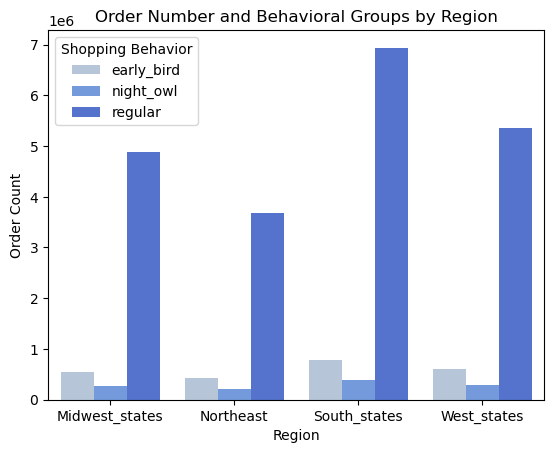

In [198]:
# creating clustered bar graph for region and shopping behavior
bar_reg_beh = sns.barplot(x='region', y='count', hue='shopping_behavior', data=reg_behavior, palette = ['lightsteelblue', 'cornflowerblue', 'royalblue'])
# adding labels & title
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Order Number and Behavioral Groups by Region')
plt.legend(title = 'Shopping Behavior')

# save figure
bar_reg_beh.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_beh.png'))

### Determining customer base by age group

In [128]:
#Creating 'age_group' column ( '>39 Young_adults', '40-64 Middle_Adult', '65< Old')
df_comp.loc[df_comp['age'] <= 39, 'age_group'] = 'Young_adults'
df_comp.loc[(df_comp['age'] >= 40) & (df_comp['age'] <= 64), 'age_group'] = 'Middle_Adult'
df_comp.loc[df_comp['age'] >= 65, 'age_group'] = 'Old'

df_comp['age_group'].value_counts(dropna = False)

age_group
Middle_Adult    9514903
Young_adults    8398887
Old             6443520
Name: count, dtype: int64

<Axes: xlabel='age_group'>

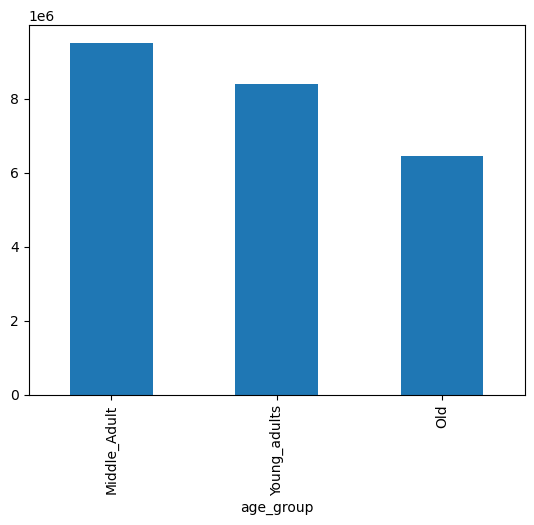

In [129]:
df_comp['age_group'].value_counts().plot.bar()

#### Middle_adults (person whos age are between 40-64) are the largest customer base 

### Creating customer flag for income and marital status

In [133]:
# analysis for customer incomes (exluded low activity customers)
df_comp['income'].describe()

count    2.435731e+07
mean     9.989662e+04
std      4.334049e+04
min      2.590300e+04
25%      6.752200e+04
50%      9.683700e+04
75%      1.281600e+05
max      5.939010e+05
Name: income, dtype: float64

#### income ranges singles 35K below low-, 35-80K middle- and 80K above upper- income

#### income ranges married 70K below low-, 70-140K middle- and 140K above upper- income

In [135]:
df_comp['family_status'].value_counts()

family_status
married                             17098012
single                               4006167
divorced/widowed                     2084703
living with parents and siblings     1168428
Name: count, dtype: int64

In [232]:
# setting the income flag for single, low-income
# making the assumption that those living with parents and siblings are single
df_comp.loc[(df_comp['family_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_comp['income'] <= 35000), 'income_range'] = 'single, low'

In [233]:
# setting the income flag for single, middle-income
df_comp.loc[(df_comp['family_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_comp['income'] > 35000) & (df_comp['income'] < 80000), 'income_range'] = 'single, middle'

In [234]:
# setting the income flag for single, high-income
df_comp.loc[(df_comp['family_status'].isin(['single', 'divorced/widowed', 'living with parents and siblings'])) & (df_comp['income'] >= 80000), 'income_range'] = 'single, high'

In [235]:
# setting the income flag for married, low-income
df_comp.loc[(df_comp['family_status']=='married') & (df_comp['income'] <= 70000), 'income_range'] = 'married, low'

In [236]:
# setting the income flag for married, middle-income
df_comp.loc[(df_comp['family_status']=='married') & (df_comp['income'] > 70000) & (df_comp['income'] < 140000), 'income_range'] = 'married, middle'

In [237]:
# setting the income flag for married, high-income
df_comp.loc[(df_comp['family_status']=='married') & (df_comp['income'] >= 140000), 'income_range'] = 'married, high'

In [238]:
df_comp['income_range'].value_counts()

income_range
married, middle    9385096
married, low       4411207
single, high       4321926
married, high      3301709
single, middle     2719091
single, low         218281
Name: count, dtype: int64

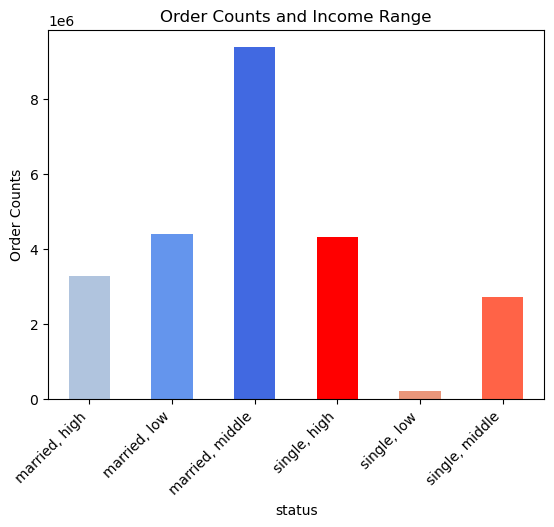

In [250]:
# creating graph for 'income_range' and 'order_count'
bar_inc_range = df_comp['income_range'].value_counts().sort_index().plot.bar(color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'red', 'darksalmon', 'tomato'])
# adding labels & title
plt.xlabel('status')
plt.ylabel('Order Counts')
plt.title('Order Counts and Income Range')

# adjusting label position
plt.xticks(rotation=45, ha='right')

# save figure
bar_inc_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_range.png'))

In [240]:
# total expenditure for each customer for each order
incomerange_order_total = df_comp.groupby(['income_range', 'user_id', 'order_number'])['prices'].sum().reset_index()

In [241]:
incomerange_order_total

,income_range,user_id,order_number,prices
0,"married, high",17,5,28.6
1,"married, high",17,6,54.6
2,"married, high",17,7,58.9
3,"married, high",17,8,73.3
4,"married, high",17,9,30.0
...,...,...,...,...
2413722,"single, middle",206193,37,124.6
2413723,"single, middle",206193,38,153.3
2413724,"single, middle",206193,39,55.1
2413725,"single, middle",206193,40,120.0


In [242]:
# expenditure statistics for each customer 
incomerange_customer_total = incomerange_order_total.groupby(['income_range', 'user_id'])['prices'].agg(['min', 'max', 'mean']).reset_index()

In [243]:
incomerange_customer_total

,income_range,user_id,min,max,mean
0,"married, high",17,3.4,101.5,53.066667
1,"married, high",19,51.4,364.0,191.900000
2,"married, high",22,4.7,100.8,35.845455
3,"married, high",36,2.1,74.9,27.651515
4,"married, high",41,112.8,112.8,112.800000
...,...,...,...,...,...
162623,"single, middle",206168,30.6,150.1,83.075000
162624,"single, middle",206171,14.4,29.6,22.000000
162625,"single, middle",206175,89.1,96.0,92.550000
162626,"single, middle",206185,13.2,87.9,46.150000


In [244]:
# find the expenditure statistics for each flag
incomerange_price_stat = incomerange_customer_total.groupby('income_range').agg({'min': 'min', 'max': 'max', 'mean': 'mean'}).reset_index()

In [245]:
incomerange_price_stat

,income_range,min,max,mean
0,"married, high",1.0,1047.4,85.085468
1,"married, low",1.0,842.1,64.437582
2,"married, middle",1.0,852.5,84.512243
3,"single, high",1.0,690.6,84.177770
4,"single, low",1.0,712.0,47.091484
5,"single, middle",1.0,875.0,73.780240


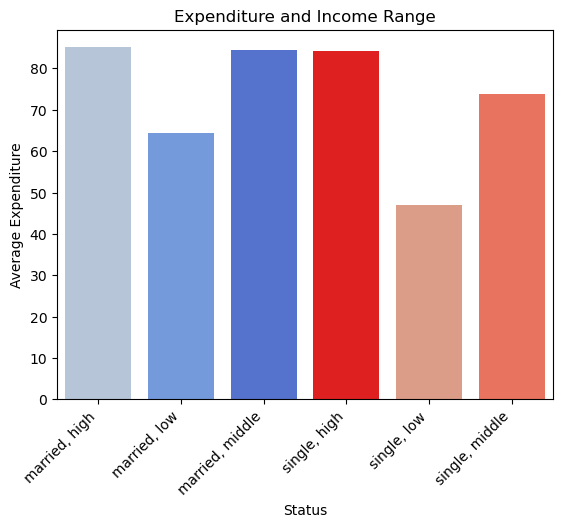

In [246]:
# creating a graph for 'income_range' and expenditure
bar_inc_exp = sns.barplot(x = 'income_range', y = 'mean', data = incomerange_price_stat, palette = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'red', 'darksalmon', 'tomato'])
# adding labels & Title
plt.xlabel('Status')
plt.ylabel('Average Expenditure')
plt.title('Expenditure and Income Range')

# adjusting label position
plt.xticks(rotation=45, ha='right')

# save figure
bar_inc_exp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_inc_exp.png'))

In [193]:
# creating crosstable for 'income_range' and 'region'
incrange_reg_cross = pd.crosstab(df_comp['region'], df_comp['income_range'], dropna = False)

In [194]:
incrange_reg_cross

income_range,"married, high-income","married, low-income","married, middle-income","single, high-income","single, low-income","single, middle-income"
region,,,,,,
Midwest_states,792073,1025779,2171245,1033040,50070,625714
Northeast,588355,766570,1683070,747840,37276,481881
South_states,1076963,1470138,3130848,1431539,68499,931826
West_states,844318,1148720,2399933,1109507,62436,679670


In [195]:
# creating table for clustered bar graph
ingrange_reg_table = incrange_reg_cross.reset_index().melt(id_vars='region', var_name='income_range', value_name='count')

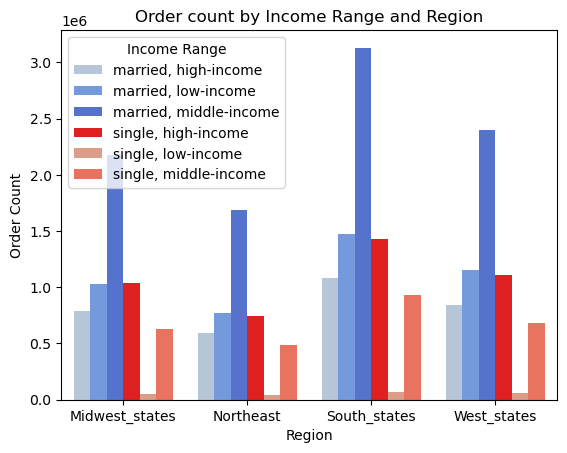

In [196]:
# create clustered bar graph for "income_range' and 'region'
bar_incrange_reg = sns.barplot(x='region', y='count', hue='income_range', data=ingrange_reg_table, palette = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'red', 'darksalmon', 'tomato'])
# adding tables & title
plt.xlabel('Region')
plt.ylabel('Order Count')
plt.title('Order count by Income Range and Region')
plt.legend(title = 'Income Range')

# save figure
bar_incrange_reg.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_incrange_reg.png'))

### Saving Crosstabs into Excel 

In [200]:
# copy crosstab data and paste into excel
reg_dep_cross.to_clipboard()

In [202]:
beh_dep_cross.to_clipboard()

In [207]:
incrange_reg_cross.to_clipboard()

In [213]:
# Exporting 'mid_high_activity' into 'Prepared Data' folder as pickle file
low_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_excluded.pkl'))

In [214]:
# Exporting 'df_comp' merged from 'low_excluded' and 'df_dep'
df_comp.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_comp.pkl'))